In [6]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns

In [7]:
# use pandas to import csv file
df = pd.read_csv("D:\DS using python lab\insurance.csv")
# too see max columns
pd.set_option('display.max_columns',None)
# print dataframe
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
#New dataframe 
new_df = df
#Checking for null values 
print(new_df.isnull().sum()) 
print("Missing values distribution: ")
print(new_df.isnull().mean())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Missing values distribution: 
age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64


In [10]:
#Replacing string values with integer 
new_df["sex"].replace({"male":"1", "female":"0"}, inplace = True) 
print(new_df.head())

   age sex     bmi  children smoker     region      charges
0   19   0  27.900         0    yes  southwest  16884.92400
1   18   1  33.770         1     no  southeast   1725.55230
2   28   1  33.000         3     no  southeast   4449.46200
3   33   1  22.705         0     no  northwest  21984.47061
4   32   1  28.880         0     no  northwest   3866.85520


In [11]:
#Finding unique values in "Region" 
print(new_df["region"].unique()) 

['southwest' 'southeast' 'northwest' 'northeast']


In [12]:
#Replacing string values with int
 
new_df['region'].replace({'northeast':'0','northwest':'1','southeast':'2','southwest':' 3'}, inplace = True)
print(new_df.head())

   age sex     bmi  children smoker region      charges
0   19   0  27.900         0    yes      3  16884.92400
1   18   1  33.770         1     no      2   1725.55230
2   28   1  33.000         3     no      2   4449.46200
3   33   1  22.705         0     no      1  21984.47061
4   32   1  28.880         0     no      1   3866.85520


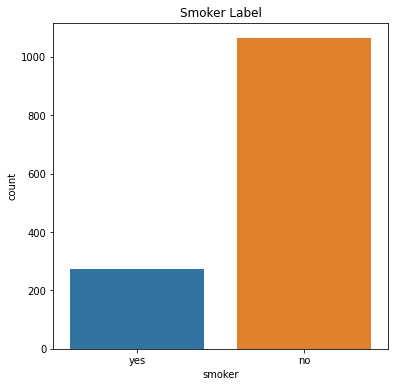

In [13]:
new_df.smoker.value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=new_df)
plt.title('Smoker Label')
plt.show()

In [14]:
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=2, class_sep=0.5,
weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [15]:
from sklearn.model_selection import train_test_split
  
# split into 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
#KNN classifer
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier() 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 
#Accuracy and Confusion matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, model.predict(X_test))) 
cm

0.98


array([[ 10,   5],
       [  0, 235]], dtype=int64)

In [17]:
#Naive Bayes Classifier
x = new_df.drop(["smoker"], axis = 1)
y = new_df.smoker.values
from sklearn.model_selection import train_test_split
  
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  0.917910447761194


In [18]:
#split dataset in features and target variable
feature_cols = ['age', 'sex', 'bmi', 'children','region','charges']
X = new_df[feature_cols] # Features
y = new_df.smoker # Target variable

In [19]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [20]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [21]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9626865671641791
